### Introduction

##### This Data Science project will review 7 years of the Title V Direct Loan Program distribution by award school.  All data sets have been pulled directly from this website:https://studentaid.gov/data-center/student/title-iv.  In order to analyze annual trends, we grabbed the "Award Year Summary" tab from each excel file that ended 12/31 to compare YoY trends. 

##### The initial hypothesis we want to prove is that loan values and participating schools should be rising over time to accommodate for rising tuition prices. According this website, tuition prices from 2012 - 2018 have been  rising on average 3.5% for all institutions (3.6% for Public, 4.4% for Private/NFP) More data on average tuition prices can be found here: https://nces.ed.gov/fastfacts/display.asp?id=76

### Libraries

In [60]:
import pandas as pd

In [61]:
from matplotlib import pyplot as plt

In [62]:
import plotly as py
import plotly.figure_factory as ff

In [63]:
import numpy as np

### Data Import & Join

In [64]:
dlp_2019 = pd.read_excel("dl-dashboard-ay2019-2020-q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2019.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2019["Year"] = 2019
dlp_2019.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,Public,3370,3421,13356264,3451,6952826,...,1228,16722864,1277,8769833,133,140,979503,151,590627,2019
1,100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,1169,1178,3512157,1871,2465575,...,199,1806153,226,1025937,144,166,2897410,183,1513954,2019


In [65]:
dlp_2018 = pd.read_excel("dl-dashboard-ay2018-2019-q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2018.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2018["Year"] = 2018
dlp_2018.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,Public,3173,3213,11991698,3235,6525350,...,1146,13995694,1188,7532369,156,159,1040063,177,631779,2018
1,100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,1186,1207,3565702,1944,2507975,...,202,1857388,224,1023071,151,179,3635751,207,1952263,2018


In [66]:
dlp_2017 = pd.read_excel("DL_Dashboard_AY2017_2018_Q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2017.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2017["Year"] = 2017
dlp_2017.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,106100,ALASKA PACIFIC UNIVERSITY,AK,995084672,Private-Nonprofit,115,115,478127,116,255355,...,16,189245,18,93409,2,2,35210,2,17605,2017
1,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,Public,1172,1200,4286754,1200,2402147,...,65,787012,65,434517,8,9,202437,9,106727,2017


In [67]:
dlp_2016 = pd.read_excel("DL_Dashboard_AY2016_2017_Q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2016.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2016["Year"] = 2016
dlp_2016.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100300,Faulkner University,AL,361093398,Private-Nonprofit,1413,1435,4307494,2272,3021887,...,222,1865222,249,1045506,193,221,5683409,229,2935470,2016
1,100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,1124,1157,4308590,1180,2367183,...,236,2283393,263,1278714,12,12,122940,12,64690,2016


In [68]:
dlp_2015 = pd.read_excel("DL_Dashboard_AY2015_2016_Q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2015.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2015["Year"] = 2015
dlp_2015.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,1458,1520,4942297,2482,3643479,...,243,1939785,290,1098878,193,223,5194329,228,2669770,2015
1,100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,1214,1235,4710718,1251,2552573,...,209,2016112,230,1147410,8,8,77096,8,38548,2015


In [69]:
dlp_2014 = pd.read_excel("DL_Dashboard_AY2014_2015_Q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2014.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2014["Year"] = 2014
dlp_2014.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,1606,1708,5495051,2644,4104159,...,202,1865428,217,1022831,197,232,4900674,252,2591521,2014
1,100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,1244,1295,5062040,1327,2718152,...,131,1158878,150,650467,11,14,140573,16,72949,2014


In [70]:
dlp_2013 = pd.read_excel("DL_Dashboard_AY2013_2014_Q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2013.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2013["Year"] = 2013
dlp_2013.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,1522,1619,5075045,2140,3867503,...,176,1566216,180,854989,193,227,4969426,227,2691374,2013
1,100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,1251,1272,5010667,1301,2740910,...,130,941620,149,535426,8,9,66642,11,37744,2013


In [71]:
dlp_2012 = pd.read_excel("DL_Dashboard_AY2012_2013_Q2.xls", sheet_name='Award Year Summary', header=[6])
dlp_2012.columns = ['OPE ID', 'School', 'State', 'Zip Code', 'School Type', 
                    'Recipients - DL SUBSIDIZED', '# of Loans Originated - DL SUBSIDIZED', '$ of Loans Originated - DL SUBSIDIZED', '# of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL SUBSIDIZED',
                    'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE', '# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE',
                    'Recipients - DL UNSUBSIDIZED - GRADUATE', '# of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE', '# of Disbursements- DL UNSUBSIDIZED - GRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE',
                    'Recipients - DL PARENT PLUS', '# of Loans Originated - DL PARENT PLUS', '$ of Loans Originated - DL PARENT PLUS', '# of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL PARENT PLUS',
                    'Recipients - DL GRAD PLUS', '# of Loans Originated - DL GRAD PLUS', '$ of Loans Originated - DL GRAD PLUS', '# of Disbursements- DL GRAD PLUS', '$ of Disbursements- DL GRAD PLUS']
dlp_2012["Year"] = 2012
dlp_2012.head(2)

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,PUBLIC,1659,1698,6245764,1698,3457478,...,199,1865628,199,1009563,2,5,24107,5,12054,2012
1,106500,UNIVERSITY OF ALASKA SOUTHEAST,AK,998018680,PUBLIC,426,438,1694603,438,873727,...,30,314828,30,163157,13,13,40380,13,20876,2012


In [72]:
    # OKAY! Now let's join all the tables since we have imported them, renamed all columns, 
    # and added the year to each record. 
loan_tables = [dlp_2019, dlp_2018, dlp_2017, dlp_2016, dlp_2015, dlp_2014, dlp_2013, dlp_2012]
loan = pd.concat(loan_tables) # This function allows us to concateneate the tables.... nifty!

#### Data Cleaning

In [73]:
    # Now that the tables have been concatenated into a master df, we'll clean up any dashes that denote no data. 
loan = loan.replace('-', '0', regex=True)
loan = loan.replace(' -', '0', regex=True)
loan = loan.replace('- ', '0', regex=True)

In [100]:
loan.replace({'PROPRIETARY':'Proprietary', 'PRIVATE': 'Private0Nonprofit', 'PUBLIC':'Public', 'FOREIGN PUBLIC':'Foreign0Public','FOREIGN PRIVATE':'Foreign0Private','FOREIGN FOR0PROFIT':'Foreign0For0Profit'}, inplace = True)

In [99]:
loan['State'].replace({'nan':'Foreign', 'FC':'Foreign', 'VI':'Foreign', 'GU':'Foreign'}, inplace=True)

In [105]:
# Let's see what the first few rows look like after concatenating and cleaning the master df. 
loan.head()

,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL SUBSIDIZED,...,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements- DL PARENT PLUS,$ of Disbursements- DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements- DL GRAD PLUS,$ of Disbursements- DL GRAD PLUS,Year
0,100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,Public,3370,3421,13356264.0,3451,6952826.0,...,1228,16722864.0,1277,8769833.0,133,140,979503.0,151,590627.0,2019
1,100300,FAULKNER UNIVERSITY,AL,361093398,Private0Nonprofit,1169,1178,3512157.0,1871,2465575.0,...,199,1806153.0,226,1025937.0,144,166,2897410.0,183,1513954.0,2019
2,100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,1004,1027,3960590.0,1030,2137690.0,...,281,3363127.0,305,1846173.0,13,14,105380.0,16,59497.0,2019
3,100500,ALABAMA STATE UNIVERSITY,AL,361045714,Public,2254,2267,9302799.0,2319,4878047.0,...,720,9937071.0,774,5251032.0,75,78,823249.0,84,446039.0,2019
4,100700,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,350100000,Public,145,149,437228.0,197,266182.0,...,1,7725.0,1,3863.0,0,0,0.0,0,0.0,2019


In [106]:
    # What is the shape/volume of the combined data set we are working with?
loan.shape

(42160, 31)

In [107]:
    # What are the current data types for each field look like?
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42160 entries, 0 to 5510
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   OPE ID                                                   42160 non-null  int64  
 1   School                                                   42160 non-null  object 
 2   State                                                    42160 non-null  object 
 3   Zip Code                                                 42160 non-null  object 
 4   School Type                                              42160 non-null  object 
 5   Recipients - DL SUBSIDIZED                               42160 non-null  int32  
 6   # of Loans Originated - DL SUBSIDIZED                    42160 non-null  int32  
 7   $ of Loans Originated - DL SUBSIDIZED                    42160 non-null  float64
 8   # of Disbursements- DL SUBS

In [108]:
# Oh wow! Look at all those object data types. Let's fix those next. 

In [109]:
    # We'll need to change all the object fields to one of int, float, or str.
    # Note: Here is where I found the data type conversion issue due to dashes, but we cleaned them out in 
        #an earlier step

    # Conversion of the string fields
loan['School'] = loan['School'].astype(str)
loan['State'] = loan['State'].astype(str)
loan['School Type'] = loan['School Type'].astype(str)
loan['Zip Code'] = loan['Zip Code'].astype(str)

    # Conversion of the float fields (currency based fields) 
loan['$ of Loans Originated - DL SUBSIDIZED'] = loan['$ of Loans Originated - DL SUBSIDIZED'].astype(float)
loan['$ of Disbursements- DL SUBSIDIZED'] = loan['$ of Disbursements- DL SUBSIDIZED'].astype(float)
loan['$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE'] = loan['$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE'].astype(float)
loan['$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'] = loan['$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'].astype(float)
loan['$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE'] = loan['$ of Loans Originated - DL UNSUBSIDIZED - GRADUATE'].astype(float)
loan['$ of Disbursements- DL UNSUBSIDIZED - GRADUATE'] = loan['$ of Disbursements- DL UNSUBSIDIZED - GRADUATE'].astype(float)
loan['$ of Loans Originated - DL PARENT PLUS'] = loan['$ of Loans Originated - DL PARENT PLUS'].astype(float)
loan['$ of Disbursements- DL PARENT PLUS'] = loan['$ of Disbursements- DL PARENT PLUS'].astype(float)
loan['$ of Loans Originated - DL GRAD PLUS'] = loan['$ of Loans Originated - DL GRAD PLUS'].astype(float)
loan['$ of Disbursements- DL GRAD PLUS'] = loan['$ of Disbursements- DL GRAD PLUS'].astype(float)

    # Conversion of the int fields

loan['Recipients - DL SUBSIDIZED'] = loan['Recipients - DL SUBSIDIZED'].astype(int)
loan['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE'] = loan['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE'].astype(int)
loan['Recipients - DL UNSUBSIDIZED - GRADUATE'] = loan['Recipients - DL UNSUBSIDIZED - GRADUATE'].astype(int)
loan['Recipients - DL PARENT PLUS'] = loan['Recipients - DL PARENT PLUS'].astype(int)
loan['Recipients - DL GRAD PLUS'] = loan['Recipients - DL GRAD PLUS'].astype(int)
                                                               
loan['# of Loans Originated - DL SUBSIDIZED'] = loan['# of Loans Originated - DL SUBSIDIZED'].astype(int)
loan['# of Disbursements- DL SUBSIDIZED'] = loan['# of Disbursements- DL SUBSIDIZED'].astype(int)
loan['# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE'] = loan['# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE'].astype(int)
loan['# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'] = loan['# of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'].astype(int)
loan['# of Loans Originated - DL UNSUBSIDIZED - GRADUATE'] = loan['# of Loans Originated - DL UNSUBSIDIZED - GRADUATE'].astype(int)
loan['# of Disbursements- DL UNSUBSIDIZED - GRADUATE'] = loan['# of Disbursements- DL UNSUBSIDIZED - GRADUATE'].astype(int)
loan['# of Loans Originated - DL PARENT PLUS'] = loan['# of Loans Originated - DL PARENT PLUS'].astype(int)
loan['# of Disbursements- DL PARENT PLUS'] = loan['# of Disbursements- DL PARENT PLUS'].astype(int)
loan['# of Loans Originated - DL GRAD PLUS'] = loan['# of Loans Originated - DL GRAD PLUS'].astype(int)
loan['# of Disbursements- DL GRAD PLUS'] = loan['# of Disbursements- DL GRAD PLUS'].astype(int)

    

In [110]:
loan.info()
    #Okay! Looks like we changed all the data types. According to Vonn, the object means that the change to str worked...!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42160 entries, 0 to 5510
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   OPE ID                                                   42160 non-null  int64  
 1   School                                                   42160 non-null  object 
 2   State                                                    42160 non-null  object 
 3   Zip Code                                                 42160 non-null  object 
 4   School Type                                              42160 non-null  object 
 5   Recipients - DL SUBSIDIZED                               42160 non-null  int32  
 6   # of Loans Originated - DL SUBSIDIZED                    42160 non-null  int32  
 7   $ of Loans Originated - DL SUBSIDIZED                    42160 non-null  float64
 8   # of Disbursements- DL SUBS

#### Data Exploration

In [111]:
# Okay! Now let's find out some loan trends over time.

In [164]:
    # Q1A: How many unique schools participated in the Title V Direct Loan Program Per Year?

schools = loan.groupby(['Year'])['School'].nunique()
schools

Year
2012    5066
2013    5040
2014    5028
2015    5013
2016    5010
2017    4888
2018    4827
2019    4771
Name: School, dtype: int64

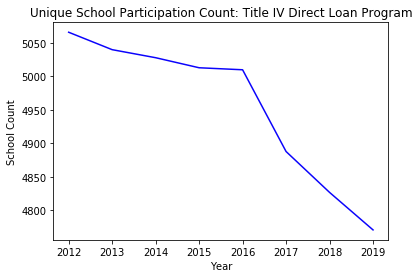

In [113]:
    # Q1B: Let's visualize this distribution.

year = ['2012', '2013', '2014', '2015', '2016', '2017', '2018','2019']

plt.plot(year, schools, color='#0b03fc') # blue hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Unique School Participation Count: Title IV Direct Loan Program")
plt.show()

##### There appears to be a downward kink from 2017 distributions onward. The Gainful Employment Regulations, effective July 1, 2015, may have impacted the schools who were eligible for distributions come 2016. More can be found here: https://www.everycrsreport.com/reports/R43159.html (Section: Current Gainful Employment Regulations)

In [114]:
    #Q2A: What is the total $ distribution over the years?

loan_total = loan['$ of Disbursements- DL SUBSIDIZED'].sum() + loan['$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'].sum() + loan['$ of Disbursements- DL UNSUBSIDIZED - GRADUATE'].sum() + loan['$ of Disbursements- DL PARENT PLUS'].sum() + loan['$ of Disbursements- DL GRAD PLUS'].sum()
loan_total

333735826580.0

In [115]:
    #Q2B: Hmmm... hard to read, huh? let's create some functions that help us read these large numbers.

def billion(value):
        return "${:,.0f}B".format(value/1000000000)
billion(loan_total)

'$334B'

In [116]:
    # Let's add another formatting function for millions.

def million(value):
        return "${:,.0f}M".format(value/1000000)
million(loan_total)

'$333,736M'

In [117]:
    # And one for 1K.
    
def thousand(value):
        return "${:,.0f}K".format(value/1000)
thousand(loan_total)
    
    # Note: More on formatting large numbers in these links
        # https://stackoverflow.com/questions/21208376/converting-float-to-dollars-and-cents
        # https://stackoverflow.com/questions/43102734/format-a-number-with-commas-to-separate-thousands-in-python

'$333,735,827K'

In [153]:
    # And a last one for the dollar.

def dollar(value):
        return "${:,.0f}".format(value/1)
thousand(loan_total)

'$333,735,827K'

In [118]:
    # Q3A: Let's see the SUM of each disbursement bucket by year.
    
    # First, let's create a single variable for the 5 Disbursement fields.
disp_buckets = ['$ of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE','$ of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL GRAD PLUS']
    
    # Now let's take the sum across the dispursement fields and group by year. 
loan_sum_year = loan.groupby(['Year'])[disp_buckets].sum()
#loan_sum_year = loan.groupby(['Year'])[disp_buckets].sum().sort_values(by=['Year'], ascending=True)
    
    # Here we'll apply the formatting to make the chart easier to read.
    for i in disp_buckets:
        loan_sum_year[i] = loan_sum_year[i].apply(million)
    
    # Return the df
loan_sum_year

,$ of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements- DL UNSUBSIDIZED - GRADUATE,$ of Disbursements- DL PARENT PLUS,$ of Disbursements- DL GRAD PLUS
Year,,,,,
2012,"$12,340M","$12,751M","$11,645M","$4,935M","$3,360M"
2013,"$11,626M","$11,937M","$11,568M","$5,081M","$3,478M"
2014,"$10,902M","$11,288M","$11,215M","$5,243M","$3,521M"
2015,"$10,095M","$10,332M","$11,108M","$5,737M","$3,666M"
2016,"$9,655M","$9,968M","$11,278M","$6,189M","$4,082M"
2017,"$9,467M","$9,546M","$11,463M","$6,377M","$4,394M"
2018,"$8,866M","$9,034M","$11,413M","$6,280M","$4,556M"
2019,"$8,419M","$8,806M","$11,223M","$6,161M","$4,731M"


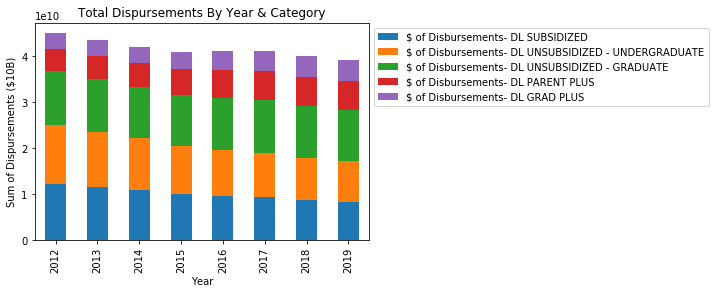

In [119]:
    # Q3B: Let's also visualize this one in a stacked bar chart.

bar_buckets = ['Year','$ of Disbursements- DL SUBSIDIZED', '$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE', '$ of Disbursements- DL UNSUBSIDIZED - GRADUATE','$ of Disbursements- DL PARENT PLUS', '$ of Disbursements- DL GRAD PLUS']
    
x = loan[bar_buckets]
y = x.set_index('Year')
z = y.groupby('Year').sum()

z.plot.bar(stacked=True)
plt.title('Total Dispursements By Year & Category')
plt.ylabel('Sum of Dispursements ($10B)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

    # Note:More legend formatting found in these links
        # https://matplotlib.org/tutorials/intermediate/legend_guide.html
        # http://www.datasciencemadesimple.com/bar-plot-bar-chart-in-python-legend-using-matplotlib/
        # https://matplotlib.org/3.1.1/api/legend_api.html

In [157]:
    # Q4: Let's see the trend of $ Disbursements / # Recipients by bucket and by year.

dl_sub_recp = loan.groupby(['Year'])['$ of Disbursements- DL SUBSIDIZED'].sum()/loan.groupby(['Year'])['Recipients - DL SUBSIDIZED'].sum()
print(dl_sub_recp.apply(dollar))

dl_us_ug_recp = loan.groupby(['Year'])['$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'].sum()/loan.groupby(['Year'])['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE'].sum()
print(dl_us_ug_recp.apply(dollar))

dl_us_g_recp = loan.groupby(['Year'])['$ of Disbursements- DL UNSUBSIDIZED - GRADUATE'].sum()/loan.groupby(['Year'])['Recipients - DL UNSUBSIDIZED - GRADUATE'].sum()
print(dl_us_g_recp.apply(dollar))

dl_pp_recp = loan.groupby(['Year'])['$ of Disbursements- DL PARENT PLUS'].sum()/loan.groupby(['Year'])['Recipients - DL PARENT PLUS'].sum()
print(dl_pp_recp.apply(dollar))

dl_gp_recp = loan.groupby(['Year'])['$ of Disbursements- DL GRAD PLUS'].sum()/loan.groupby(['Year'])['Recipients - DL GRAD PLUS'].sum()
print(dl_gp_recp.apply(dollar))


Year
2012    $2,156
2013    $2,128
2014    $2,109
2015    $2,106
2016    $2,129
2017    $2,159
2018    $2,144
2019    $2,142
dtype: object
Year
2012    $2,367
2013    $2,312
2014    $2,285
2015    $2,221
2016    $2,229
2017    $2,214
2018    $2,195
2019    $2,213
dtype: object
Year
2012    $10,271
2013    $10,383
2014    $10,294
2015    $10,246
2016    $10,378
2017    $10,546
2018    $10,458
2019    $10,428
dtype: object
Year
2012    $8,078
2013    $8,144
2014    $8,224
2015    $7,927
2016    $8,371
2017    $8,705
2018    $8,907
2019    $9,179
dtype: object
Year
2012    $12,328
2013    $12,647
2014    $12,714
2015    $12,652
2016    $13,271
2017    $13,807
2018    $14,038
2019    $14,326
dtype: object


In [120]:
    # Q5: Let's see the MAX of each disbursement bucket by year.

loan_max_year = loan.groupby(['Year'])[disp_buckets].max()
#loan_max_year = loan.groupby(['Year'])[disp_buckets].max().sort_values(by=['Year'],ascending=False)

    for i in disp_buckets:
        loan_max_year[i] = loan_max_year[i].apply(million)
loan_max_year 

,$ of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements- DL UNSUBSIDIZED - GRADUATE,$ of Disbursements- DL PARENT PLUS,$ of Disbursements- DL GRAD PLUS
Year,,,,,
2012,$243M,$309M,$260M,$72M,$100M
2013,$178M,$231M,$262M,$73M,$106M
2014,$141M,$179M,$249M,$76M,$114M
2015,$94M,$123M,$229M,$81M,$115M
2016,$74M,$89M,$219M,$89M,$172M
2017,$72M,$76M,$212M,$89M,$187M
2018,$68M,$78M,$206M,$86M,$200M
2019,$64M,$82M,$205M,$84M,$161M


In [121]:
    # Q6: Let's see the MIN of each disbursements bucket by year.

loan_min_year = loan.groupby(['Year'])[disp_buckets].min()
#loan_min_year = loan.groupby(['Year'])[disp_buckets].min().sort_values(by=['Year'],ascending=False)

    # We can skip the formatting since the min values are 0.
loan_min_year 

,$ of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements- DL UNSUBSIDIZED - GRADUATE,$ of Disbursements- DL PARENT PLUS,$ of Disbursements- DL GRAD PLUS
Year,,,,,
2012,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0


In [122]:
    # Q7A: Let's see the average dispursement by year. (MEAN)

loan_mean_year = loan.groupby(['Year'])[disp_buckets].mean()
#loan_mean_year = loan.groupby(['Year'])[disp_buckets].mean().sort_values(by=['Year'],ascending=False)

    for i in disp_buckets:
        loan_mean_year[i] = loan_mean_year[i].apply(thousand)
loan_mean_year 

,$ of Disbursements- DL SUBSIDIZED,$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements- DL UNSUBSIDIZED - GRADUATE,$ of Disbursements- DL PARENT PLUS,$ of Disbursements- DL GRAD PLUS
Year,,,,,
2012,"$2,239K","$2,314K","$2,113K",$896K,$610K
2013,"$2,153K","$2,211K","$2,143K",$941K,$644K
2014,"$2,027K","$2,099K","$2,085K",$975K,$655K
2015,"$1,889K","$1,933K","$2,078K","$1,073K",$686K
2016,"$1,835K","$1,895K","$2,144K","$1,176K",$776K
2017,"$1,830K","$1,845K","$2,216K","$1,233K",$849K
2018,"$1,740K","$1,773K","$2,241K","$1,233K",$894K
2019,"$1,684K","$1,762K","$2,245K","$1,232K",$946K


In [123]:
    # Q7B:  Let's clean out 0's from the averages to see if the trends look differenet.
    
#  $ of Disbursements- DL SUBSIDIZED
dl_sub_gt0 = loan[loan['$ of Disbursements- DL SUBSIDIZED']>0]
dl_sub_gt0_new = dl_sub_gt0.groupby(['Year'])['$ of Disbursements- DL SUBSIDIZED'].mean()

#  $ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE
dl_unsub_ug_gt0 = loan[loan['$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE']>0]
dl_unsub_ug_gt0_new = dl_sub_gt0.groupby(['Year'])['$ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE'].mean()

#  $ of Disbursements- DL PARENT PLUS
dl_pp_gt0 = loan[loan['$ of Disbursements- DL PARENT PLUS']>0]
dl_pp_gt0_new = dl_sub_gt0.groupby(['Year'])['$ of Disbursements- DL PARENT PLUS'].mean()

#  $ of Disbursements- DL GRAD PLUS
dl_gp_gt0 = loan[loan['$ of Disbursements- DL GRAD PLUS']>0]
dl_gp_gt0_new = dl_sub_gt0.groupby(['Year'])['$ of Disbursements- DL GRAD PLUS'].mean()


print(dl_sub_gt0_new.apply(thousand))
print(dl_unsub_ug_gt0_new.apply(thousand))
print(dl_pp_gt0_new.apply(thousand))
print(dl_gp_gt0_new.apply(thousand))


Year
2012    $2,402K
2013    $2,314K
2014    $2,180K
2015    $2,031K
2016    $1,977K
2017    $1,973K
2018    $1,876K
2019    $1,815K
Name: $ of Disbursements- DL SUBSIDIZED, dtype: object
Year
2012    $2,482K
2013    $2,376K
2014    $2,257K
2015    $2,078K
2016    $2,040K
2017    $1,990K
2018    $1,911K
2019    $1,899K
Name: $ of Disbursements- DL UNSUBSIDIZED - UNDERGRADUATE, dtype: object
Year
2012      $961K
2013    $1,011K
2014    $1,048K
2015    $1,154K
2016    $1,267K
2017    $1,329K
2018    $1,329K
2019    $1,328K
Name: $ of Disbursements- DL PARENT PLUS, dtype: object
Year
2012    $516K
2013    $547K
2014    $562K
2015    $589K
2016    $671K
2017    $735K
2018    $777K
2019    $807K
Name: $ of Disbursements- DL GRAD PLUS, dtype: object


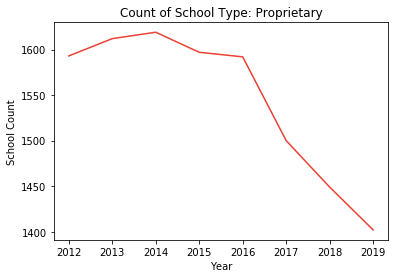

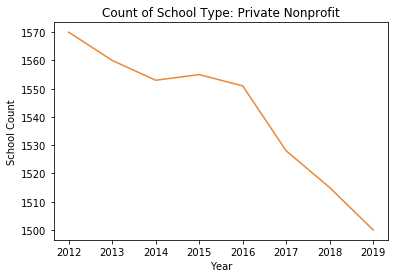

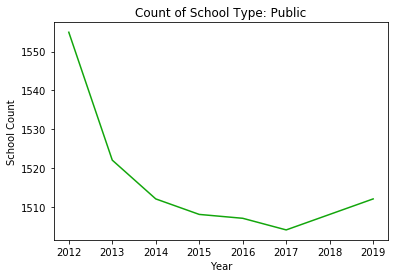

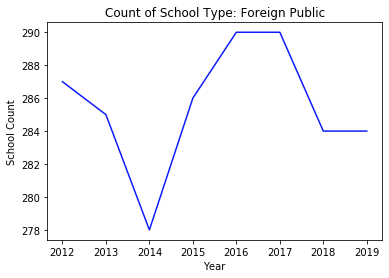

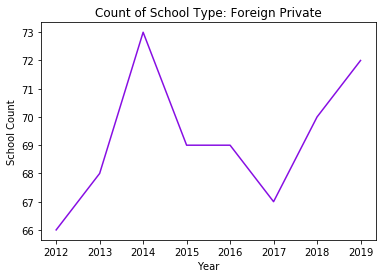

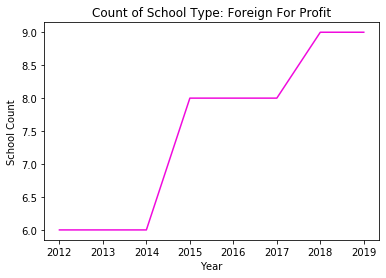

In [166]:
        # Q8: Let's see the unique count of schools by School Type and by Year.

year = ['2012','2013','2014','2015','2016','2017','2018','2019']

prop = loan.groupby(['School Type','Year'])['School'].nunique()['Proprietary']
plt.plot(year, prop ,color='#eb4034') # red hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Count of School Type: Proprietary")
plt.show()

pnp = loan.groupby(['School Type','Year'])['School'].nunique()['Private0Nonprofit']
plt.plot(year, pnp ,color='#eb8634') # orange hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Count of School Type: Private Nonprofit")
plt.show()

public = loan.groupby(['School Type','Year'])['School'].nunique()['Public']
plt.plot(year, public ,color='#13a60c') # green hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Count of School Type: Public")
plt.show()

for_pub = loan.groupby(['School Type','Year'])['School'].nunique()['Foreign0Public']
plt.plot(year, for_pub ,color='#0c1cfa') # blue hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Count of School Type: Foreign Public")
plt.show()

for_priv = loan.groupby(['School Type','Year'])['School'].nunique()['Foreign0Private']
plt.plot(year, for_priv ,color='#870ee3') # purple hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Count of School Type: Foreign Private")
plt.show()

for_priv = loan.groupby(['School Type','Year'])['School'].nunique()['Foreign0For0Profit']
plt.plot(year, for_priv ,color='#f00add') # pink hex
plt.xlabel("Year")
plt.ylabel("School Count")
plt.title("Count of School Type: Foreign For Profit")
plt.show()


In [163]:
    # Q9: Let's see how the top 5 states rank by school count for 2012 and 2019.

state_2019 = loan.groupby(['Year','State'])['School'].nunique().sort_values(ascending=False)[2019].head(5)
state_2012 = loan.groupby(['Year','State'])['School'].nunique().sort_values(ascending=False)[2012].head(5)
print(state_2019)
print(state_2012)

State
CA         478
Foreign    367
NY         324
TX         277
PA         249
Name: School, dtype: int64
State
CA         497
Foreign    361
NY         347
PA         283
TX         268
Name: School, dtype: int64


#### Findings

We find a few trends that differ from our initial hypotheses that school loans are rising YoY.  
1) School counts participating in the Title IV program are decreasing YoY.
2) Total loan disbursements for 3 out of 5 buckets are decreasing YoY. The total loan values for Grad Plus and Parent Plus are rising YoY.
3) The dollars per recipient has not changed dramatically YoY.
4) The max dispursement per year follows the same treand as total loan disbursements. Three buckets have decreased YoY and Grad Plus & Parent Plus saw increases. 
5) US Schools are declining in participation whereas Foreign school participation in the Title IV program is on the rise. 
6) US State participation has not changed dramatical from 2012 to 2019.

#### Summary

The loan data indicates that loan volumes under the Title IV program is in decline, outside of Parent and Grad loans awards, but tuition prices are on the rise. More areas to research would be the potential rise of cash payments, alternative federal sources of loans, alternative private sources of loans. 

Tuition Trend Data: https://nces.ed.gov/fastfacts/display.asp?id=76

### Takeaway Notes

1) value_counts does not behave like a regular aggregation (sum, min, max, mean, etc.). Ergo, we had to play around with syntax to get the right sorting by year.

2) Multi grouping can work in place of/better when you have a multi-level index table (year, x).
